In [93]:
import codecs
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model

    

In [94]:
def read_file(fn):
    with codecs.open(fn,encoding="utf-8") as f:
        return f.read()

#  Chirac/Mitterrand

In [95]:
fname="AFDpresidentutf8/corpus.tache1.learn.utf8"

nblignes = 10000
#print( "nblignes = %d",nblignes)
#labs = np.ones(nblignes)

def get_text(fname,nblignes):
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    alltxts = []
    allabs=[]
    cpt = 0
    for i in range(nblignes):
        txt = s.readline()

        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)

        alltxts.append(txt)
        if(lab[0]=='C'):
            l=1
        else:
            l=-1
        allabs.append(l)
        cpt += 1
    return alltxts,allabs

In [91]:
print(allabs.count(1),allabs.count(-1))

4301 1199


## Sans tf-idf

In [84]:
vectorizer = CountVectorizer()
classif = svm.LinearSVC()
score={}
for n in range (1000,20000,500):
    alltxts,allabs=get_text(fname,n)
    Matrix = vectorizer.fit_transform(alltxts)
    cv_results = cross_validate(classif, Matrix, allabs)
    score[n]=max(cv_results['test_score'])
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{1000: 0.83, 1500: 0.8433333333333334, 2000: 0.7725, 2500: 0.79, 3000: 0.7966666666666666, 3500: 0.7885714285714286, 4000: 0.8, 4500: 0.8155555555555556, 5000: 0.81, 5500: 0.82, 6000: 0.8333333333333334, 6500: 0.8353846153846154, 7000: 0.8307142857142857, 7500: 0.8333333333333334, 8000: 0.836875, 8500: 0.8335294117647059, 9000: 0.8361111111111111, 9500: 0.8326315789473684, 10000: 0.8345, 10500: 0.8247619047619048, 11000: 0.8304545454545454, 11500: 0.8356521739130435, 12000: 0.8345833333333333, 12500: 0.8392, 13000: 0.8384615384615385, 13500: 0.8388888888888889, 14000: 0.8457142857142858, 14500: 0.8479310344827586, 15000: 0.8513333333333334, 15500: 0.8490322580645161, 16000: 0.8440625, 16500: 0.8463636363636363, 17000: 0.8458823529411764, 17500: 0.8434285714285714, 18000: 0.8441666666666666, 18500: 0.8451351351351352, 19000: 0.8463157894736842, 19500: 0.8407692307692308}


## Avec tf-idf

In [85]:
score_tfidf={}
tfidfvect=TfidfVectorizer()
classif = svm.LinearSVC()
for n in range (1000,20000,500):
    alltxts,allabs=get_text(fname,n)
    Matrix_tfidf=tfidfvect.fit_transform(alltxts)
    cv_results = cross_validate(classif, Matrix_tfidf, allabs)
    score_tfidf[n]=max(cv_results['test_score'])
print(score_tfidf)


{1000: 0.845, 1500: 0.82, 2000: 0.795, 2500: 0.802, 3000: 0.8266666666666667, 3500: 0.82, 4000: 0.815, 4500: 0.8177777777777778, 5000: 0.824, 5500: 0.8309090909090909, 6000: 0.84, 6500: 0.84, 7000: 0.8557142857142858, 7500: 0.85, 8000: 0.85625, 8500: 0.8494117647058823, 9000: 0.8566666666666667, 9500: 0.8557894736842105, 10000: 0.857, 10500: 0.8480952380952381, 11000: 0.8527272727272728, 11500: 0.8552173913043478, 12000: 0.8545833333333334, 12500: 0.8592, 13000: 0.8607692307692307, 13500: 0.8618518518518519, 14000: 0.8675, 14500: 0.8693103448275862, 15000: 0.8706666666666667, 15500: 0.8680645161290322, 16000: 0.8690625, 16500: 0.8675757575757576, 17000: 0.866764705882353, 17500: 0.8657142857142858, 18000: 0.8661111111111112, 18500: 0.8656756756756757, 19000: 0.8655263157894737, 19500: 0.8630769230769231}


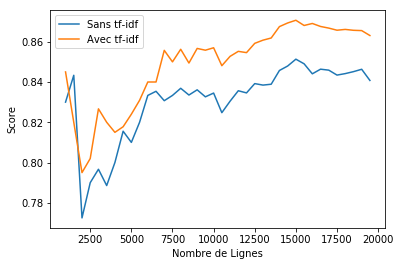

In [86]:
plt.plot(score.keys(),score.values(),label="Sans tf-idf")
plt.plot(score_tfidf.keys(),score_tfidf.values(),label="Avec tf-idf")
plt.legend()
plt.ylabel("Score")
plt.xlabel("Nombre de Lignes")
plt.show()

In [87]:
score_lowercase={}
tfidfvectlc=TfidfVectorizer(lowercase=True)
classif = svm.LinearSVC()
for n in range (1000,20000,500):
    alltxts,allabs=get_text(fname,n)
    Matrix_tfidf=tfidfvectlc.fit_transform(alltxts)
    cv_results = cross_validate(classif, Matrix_tfidf, allabs)
    score_lowercase[n]=max(cv_results['test_score'])
print(score_lowercase)


{1000: 0.845, 1500: 0.82, 2000: 0.795, 2500: 0.802, 3000: 0.8266666666666667, 3500: 0.82, 4000: 0.815, 4500: 0.8177777777777778, 5000: 0.824, 5500: 0.8309090909090909, 6000: 0.84, 6500: 0.84, 7000: 0.8557142857142858, 7500: 0.85, 8000: 0.85625, 8500: 0.8494117647058823, 9000: 0.8566666666666667, 9500: 0.8557894736842105, 10000: 0.857, 10500: 0.8480952380952381, 11000: 0.8527272727272728, 11500: 0.8552173913043478, 12000: 0.8545833333333334, 12500: 0.8592, 13000: 0.8607692307692307, 13500: 0.8618518518518519, 14000: 0.8675, 14500: 0.8693103448275862, 15000: 0.8706666666666667, 15500: 0.8680645161290322, 16000: 0.8690625, 16500: 0.8675757575757576, 17000: 0.866764705882353, 17500: 0.8657142857142858, 18000: 0.8661111111111112, 18500: 0.8656756756756757, 19000: 0.8655263157894737, 19500: 0.8630769230769231}


In [88]:
score_uppercase={}
tfidfvectuc=TfidfVectorizer(lowercase=False)
classif = svm.LinearSVC()
for n in range (1000,20000,500):
    alltxts,allabs=get_text(fname,n)
    Matrix_tfidf=tfidfvectuc.fit_transform(alltxts)
    cv_results = cross_validate(classif, Matrix_tfidf, allabs)
    score_uppercase[n]=max(cv_results['test_score'])
print(score_uppercase)

KeyboardInterrupt: 

In [ ]:
plt.plot(score.keys(),score.values(),label="Sans tf-idf")
plt.plot(score_tfidf.keys(),score_tfidf.values(),label="Avec tf-idf")
#plt.plot(score_lowercase.keys(),score_lowercase.values(),label="Avec tf-idf minuscule")
plt.plot(score_uppercase.keys(),score_uppercase.values(),label="Avec tf-idf et majuscule")
plt.legend()
plt.ylabel("Score")
plt.xlabel("Nombre de Lignes")
plt.title("Score avec tf-idf")
plt.show()

## Prédiction

In [ ]:
#### Learning 
tfidfvectuc=TfidfVectorizer(lowercase=False)
classif = svm.LinearSVC()
alltxts,allabs=get_text(fname,15000)
Matrix_tfidf=tfidfvectuc.fit_transform(alltxts)
classif.fit(Matrix_tfidf, allabs)

#### Testing

fname_test="AFDpresidentutf8/corpus.tache1.test.utf8"
alltxts_test = []
s=codecs.open(fname_test, 'r','utf-8') # pour régler le codage
#generation du bow du fichier test
cpt = 0
for i in range(nblignes):
    txt = s.readline()
    txt = re.sub(r"<[0-9]*:[0-9]*>(.*)","\\1",txt)

    alltxts_test.append(txt)

vect_test=TfidfVectorizer(lowercase=False,vocabulary=tfidfvectuc.get_feature_names())
Matrix_test=vect_test.fit_transform(alltxts_test)
prediction=classif.predict(Matrix_test)
fichier = open("prediction.txt", "a")
for res in prediction:
    if (res ==1):
        fichier.write("C\n")
    else:
        fichier.write("M\n")
fichier.close()

# Films

In [107]:
#from tools import *
import os.path

path = "/home/h_djeddal/DAC/RITAL/TAL/Classification/AFDmovies/movies1000/"

alltxts = [] # init vide
labs = []
cpt = 0
for cl in os.listdir(path): # parcours des fichiers d'un répertoire
    print (cl)
    for f in os.listdir(path+cl):
        txt = read_file(path+cl+'/'+f)
        alltxts.append(txt)
        labs.append(cpt)
    cpt += 1

pos
neg


## Sans tf-idf


In [97]:
vectorizer = CountVectorizer()
classif = svm.LinearSVC()
results={}
Matrix = vectorizer.fit_transform(alltxts)
cv_results = cross_validate(classif, Matrix, labs)
results["sans tf-idf"]= max(cv_results['test_score'])

tfidfvect=TfidfVectorizer()
Matrix_tfidf=tfidfvect.fit_transform(alltxts)
cv_results = cross_validate(classif, Matrix_tfidf, labs)
results["avec tf-idf"]= max(cv_results['test_score'])

tfidfvectlc=TfidfVectorizer(lowercase=True)
Matrix_tfidflc=tfidfvectlc.fit_transform(alltxts)
cv_results = cross_validate(classif, Matrix_tfidflc, labs)
results["avec tf-idf en minuscule"]= max(cv_results['test_score'])

tfidfvectup=TfidfVectorizer(lowercase=False)
Matrix_tfidfup=tfidfvectup.fit_transform(alltxts)
cv_results = cross_validate(classif, Matrix_tfidfup, labs)
results["avec tf-idf et majuscule"]= max(cv_results['test_score'])

print(results)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'sans tf-idf': 0.845, 'avec tf-idf': 0.8725, 'avec tf-idf en minuscule': 0.8725, 'avec tf-idf et majuscule': 0.8725}


## Prediction 

In [116]:
#### Learning
tfidfvectuc=TfidfVectorizer(lowercase=True)
classif = svm.LinearSVC()
Matrix_tfidf=tfidfvectuc.fit_transform(alltxts)
classif.fit(Matrix_tfidf, labs)

#### Testing

fname_test="moviesTest/testSentiment.txt"
alltxts_test = []
s=codecs.open(fname_test, 'r','utf-8') # pour régler le codage
#generation du bow du fichier test
file =read_file(fname_test)
txt_test=file.split("\n")



vect_test=TfidfVectorizer(lowercase=True,vocabulary=tfidfvectuc.get_feature_names())
Matrix_test=vect_test.fit_transform(txt_test)
prediction=classif.predict(Matrix_test)
print(prediction)
fichier = open("prediction_movies.txt", "a")
for res in prediction:
    if (res ==1):
        fichier.write("neg\n")
    else:
        fichier.write("pos\n")
fichier.close()


[1 1 1 ... 1 1 1]
